# Practicing AB Testing with Movies

In [7]:
## Importing our study group functions
%load_ext autoreload
%autoreload 2
import sys
py_folder = "../../py_files/"
sys.path.append(py_folder)
import functions_SG as sg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-talk')

In [8]:
df = pd.read_csv('../topic_12_statistical_distributions/joined_movie_data_for_sg.csv')
display(df.head())
df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3467 non-null   int64  
 1   release_date       3467 non-null   object 
 2   movie              3467 non-null   object 
 3   production_budget  3467 non-null   float64
 4   domestic_gross     3467 non-null   float64
 5   worldwide_gross    3467 non-null   float64
 6   tconst             3467 non-null   object 
 7   primary_title      3467 non-null   object 
 8   original_title     3467 non-null   object 
 9   start_year         3467 non-null   int64  
 10  runtime_minutes    3056 non-null   float64
 11  genres             3467 non-null   object 
 12  revenue-domestic   3467 non-null   float64
 13  revenue-worldwide  3467 non-null   float64
 14  lost_money         3467 non-null   bool   
 15  roi-domestic       3467 non-null   float64
 16  roi-worldwide      3467 

In [11]:
df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      411
genres                 0
revenue-domestic       0
revenue-worldwide      0
lost_money             0
roi-domestic           0
roi-worldwide          0
release_month          0
dtype: int64

In [12]:
df.dropna(subset=['runtime_minutes'],inplace=True)

# Q1: Do movies with longer run times generate more or less revenue than shorter run times?

- H0: Long and Short Movies generate the same revenue. 
- H1: Long and Short Movies generate the same revenue.


- Groups: define long/short movies
- Measure: revenue-worldwide
- test = two sample t-test

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


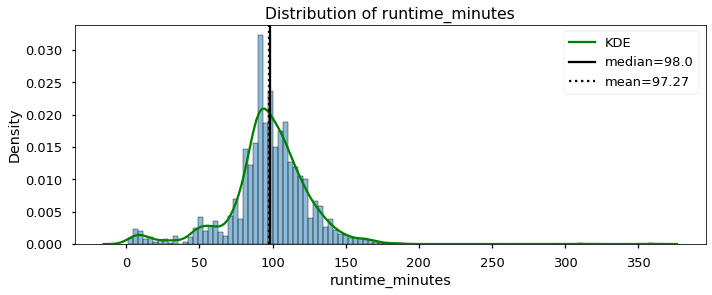

In [47]:
sg.plot_distribution(df['runtime_minutes'],boxplot=False, verbose=False);

In [44]:
df['runtime_minutes'].describe()

count    3056.000000
mean       97.269634
std        27.459274
min         1.000000
25%        87.000000
50%        98.000000
75%       112.000000
max       360.000000
Name: runtime_minutes, dtype: float64

In [16]:
## Create binary groups
median = df['runtime_minutes'].median()
df['runtime_group'] = (df['runtime_minutes'] >median ).map({True:'Long',
                                                            False:'Short'})
df['runtime_group'].value_counts()

Short    1575
Long     1481
Name: runtime_group, dtype: int64

<AxesSubplot:xlabel='runtime_group', ylabel='revenue-worldwide'>

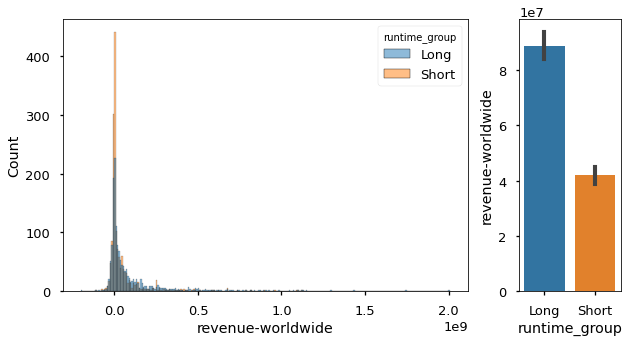

In [19]:
## Visualize Distributions and Means
fig, axes = plt.subplots(ncols=2, figsize=(10,5),gridspec_kw={'width_ratios':[0.8,0.2]})

sns.histplot(data=df,x='revenue-worldwide',hue='runtime_group' ,ax=axes[0])
sns.barplot(data=df, y='revenue-worldwide',x='runtime_group' ,ax=axes[1],ci=68)


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


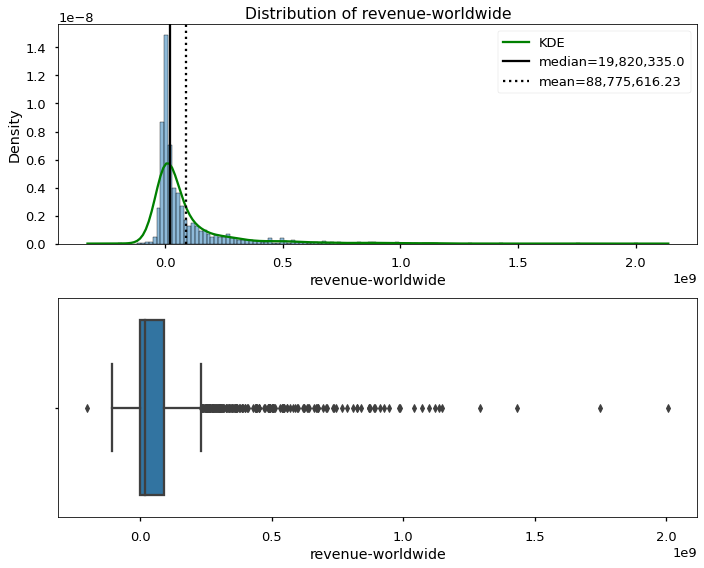

[i] Distribution Stats:
	Skew = 3.83
	Kurtosis = 20.85
	N = 1,481

 NormaltestResult(statistic=1231.9903354325872, pvalue=2.9970761780432155e-268)
	- p<.05: The distribution is NOT normally distributed.


In [54]:
## Assumption of normality
long = df.groupby('runtime_group').get_group('Long')
sg.plot_distribution(long,col='revenue-worldwide');

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


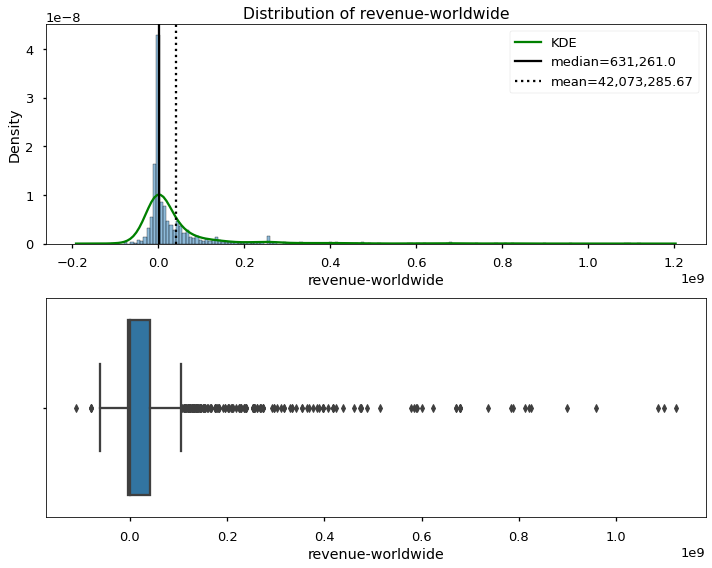

[i] Distribution Stats:
	Skew = 4.63
	Kurtosis = 27.23
	N = 1,575

 NormaltestResult(statistic=1506.7633480587187, pvalue=0.0)
	- p<.05: The distribution is NOT normally distributed.


In [55]:
short = df.groupby('runtime_group').get_group('Short')
sg.plot_distribution(short,col='revenue-worldwide');

In [56]:
stats.levene(long['revenue-worldwide'],short['revenue-worldwide'])

LeveneResult(statistic=65.80095161159777, pvalue=7.150107524254608e-16)

In [57]:
stats.mannwhitneyu(long['revenue-worldwide'],short['revenue-worldwide'])

MannwhitneyuResult(statistic=945753.5, pvalue=7.353809163784022e-20)

In [58]:
stats.ttest_ind(long['revenue-worldwide'],short['revenue-worldwide'],equal_var=False)

Ttest_indResult(statistic=8.196467052904813, pvalue=3.929922747194687e-16)

# Q2 Are short run time movies more likely to lose money?

- Two categorical features
- 


In [59]:
iv_col = 'runtime_group'
dep_col = 'lost_money'

tab = pd.crosstab(df[iv_col],df[dep_col])
tab

lost_money,False,True
runtime_group,,
Long,662,819
Short,556,1019


### Chi-Squared

In [35]:
chi2,p,dof,expected = stats.chi2_contingency(tab)
p

1.3931683245489407e-07

In [37]:
tab

lost_money,False,True
runtime_group,,
Long,662,819
Short,556,1019


## Fisher's Exact

In [34]:
odds,p = stats.fisher_exact(tab)
p

1.2280597507901087e-07

In [32]:
tab_perc = pd.crosstab(df[iv_col],df[dep_col],normalize=True,margins=True)
tab_perc

lost_money,False,True,All
runtime_group,,,
Long,0.216623,0.267997,0.48462
Short,0.181937,0.333442,0.51538
All,0.398560,0.601440,1.00000


# Do movies in some genres earn more revenue than others?

In [63]:
df['genre_list'] = df['genres'].str.split(',')
genre_df = df.explode('genre_list')
genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month,runtime_group,genre_list
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,635063875.0,True,-41.289850,154.667286,5,Long,Action
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,635063875.0,True,-41.289850,154.667286,5,Long,Adventure
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,635063875.0,True,-41.289850,154.667286,5,Long,Fantasy
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-200237650.0,True,-87.782186,-57.210757,6,Long,Action
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-200237650.0,True,-87.782186,-57.210757,6,Long,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000.0,-7000.0,True,-100.000000,-100.000000,12,Short,Sci-Fi
3465,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000.0,-7000.0,True,-100.000000,-100.000000,12,Short,Thriller
3466,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013,76.0,"Drama,Horror,Thriller",-1400.0,-1400.0,True,-100.000000,-100.000000,9,Short,Drama
3466,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013,76.0,"Drama,Horror,Thriller",-1400.0,-1400.0,True,-100.000000,-100.000000,9,Short,Horror
